In [1]:
import sys


def splitter(line):
    
    tmp = []
    words = []
    
    seperator = (' ', '\n', '.', ',', '?', '!', '[', ']', '(', ')', ';', ':', '"', '-', )
                                                        # ignore special letters that appers in the text
    for idx, word in enumerate(line):
        if not (word in seperator):
            if word is not "'":
                tmp.append(word)
                                                        # if a letter(a-z) comes after " ' ", include " ' " in the word
            if word == "'" and line[idx+1] not in seperator:
                tmp.append(word)
        else:
            if len(tmp) is 0:                           # ignore empty words
                continue
            elif ''.join(tmp).upper() == ''.join(tmp):  # ignore all-upper-case words
                tmp = []
            else:
                words.append(''.join(tmp).lower())      # make word lower case
                tmp = []
                
    return words

def sorter(words):
    
    wlist = []

    for key in words.keys():
        wlist.append([key, words[key]])
    
    #bubblesort
    
    for n in range(len(wlist)-1,0,-1):
        for i in range(n):
            if wlist[i][1]<wlist[i+1][1]:
                temp = wlist[i]
                wlist[i] = wlist[i+1]
                wlist[i+1] = temp
                
    return wlist

#####################################################################################################

file = open("romeoandjuliet.txt")

worddict = {}

for line in file:
    for word in splitter(line):
        for w in worddict.keys():                       # if key already in worddict.keys()
            if w == word:
                worddict[word]+=1                       # add 1 to value
                break
        else:                                           # if new key
            worddict[word] = 1                          # add key / set value to 1

sorted = sorter(worddict)

print('end!')



end!


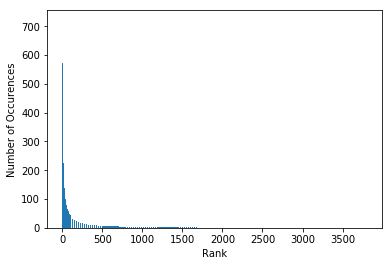

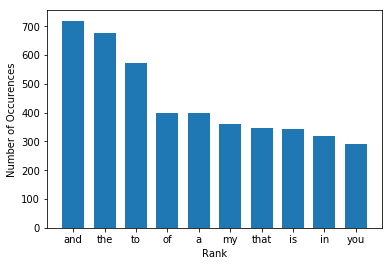

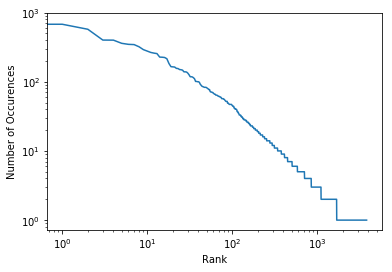

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math

#++++++++++++++++++++++++++++++++++#
#            Graph 1               #
#++++++++++++++++++++++++++++++++++#

ind = [x[0] for x in sorted]
ly = [x[1] for x in sorted]

p1 = plt.bar(np.arange(len(sorted)),ly, 0.7 )

plt.xlabel('Rank')
plt.ylabel('Number of Occurences')
    
plt.show()

#++++++++++++++++++++++++++++++++++#
#            Graph 2               #
#++++++++++++++++++++++++++++++++++#

ly10 = ly[0:10]

p1 = plt.bar(ind[0:10],ly10, 0.7 )

plt.xlabel('Rank')
plt.ylabel('Number of Occurences')

plt.show()

#++++++++++++++++++++++++++++++++++#
#            Graph 3               #
#++++++++++++++++++++++++++++++++++#


indlog = [ round(math.log10(x),3) for x in range(1,len(sorted)) ]
lylog = [ round(math.log10(x[1]),3) for x in sorted ]

#p1 = plt.bar(indlog,lylog, 0.7 )
p1 = plt.loglog(np.arange(len(sorted)), ly, basex=10)

plt.xlabel('Rank')
plt.ylabel('Number of Occurences')

plt.show()

